In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

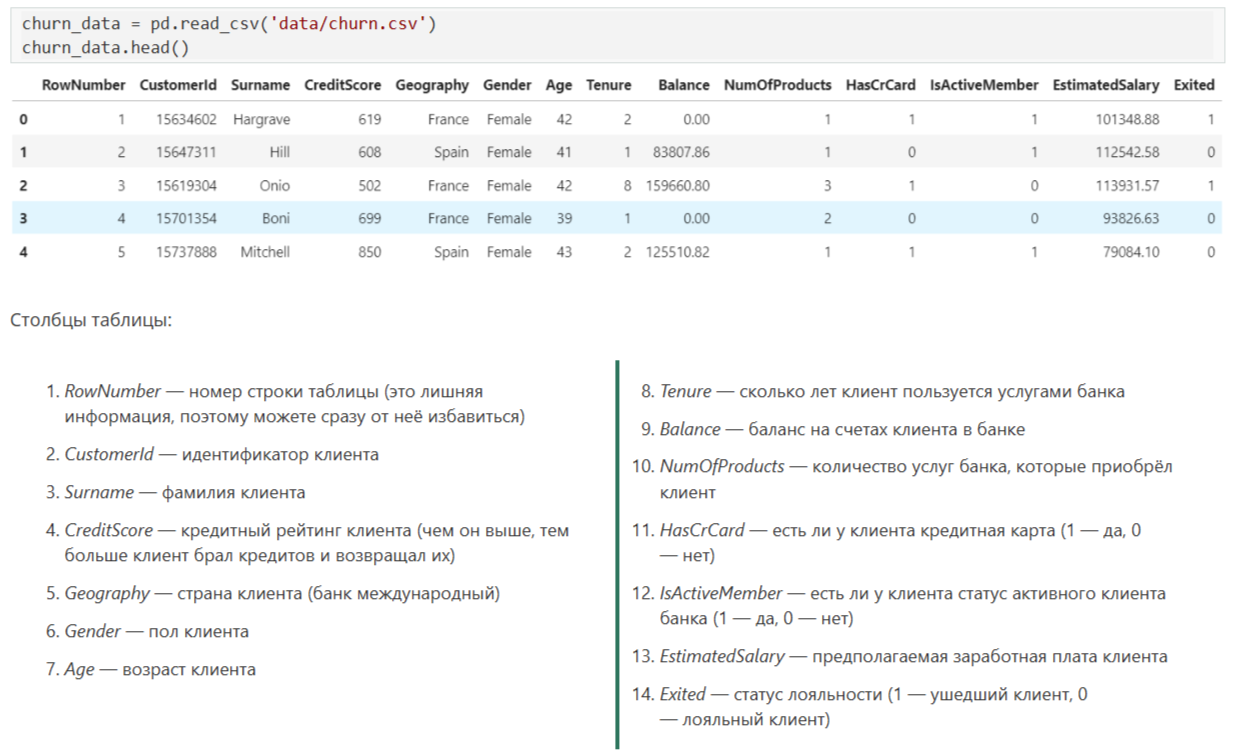

In [2]:
churn_data = pd.read_csv(r'C:\Users\user\Desktop\Skilfactory\data\churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [4]:
def rename_Exited(number):
  if number == 1:
    return 'Ушедший клиент'
  else:
    return 'Лояльный клиент'

In [5]:
churn_data['Exited_copy'] = churn_data['Exited'].copy()

In [6]:
churn_data['Exited'] = churn_data['Exited'].apply(rename_Exited)

In [7]:
data_Exited = churn_data['Exited'].value_counts()
data_Exited

Exited
Лояльный клиент    7963
Ушедший клиент     2037
Name: count, dtype: int64

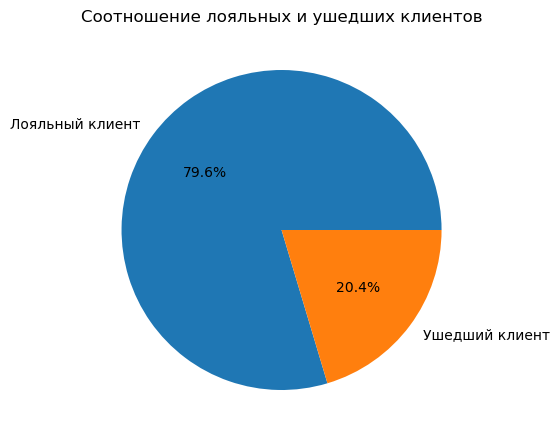

In [8]:
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    x=data_Exited,
    labels=data_Exited.index,
    autopct='%.1f%%'
);
axes.set_title('Соотношение лояльных и ушедших клиентов');

Ответ на вопрос 1:

Из построенной диаграммы видно, что лояльных клиентов 79.6%, а ушедших 20.4%. Тот факт, что почти 20.4% клиентов ушли из банка, указывает на серьёзные проблемы в удержании аудитории. Это может быть связано с неудовлетворённостью обслуживанием или высокой конкуренцией.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [9]:
data_balance = churn_data[churn_data['Balance'] > 2500]

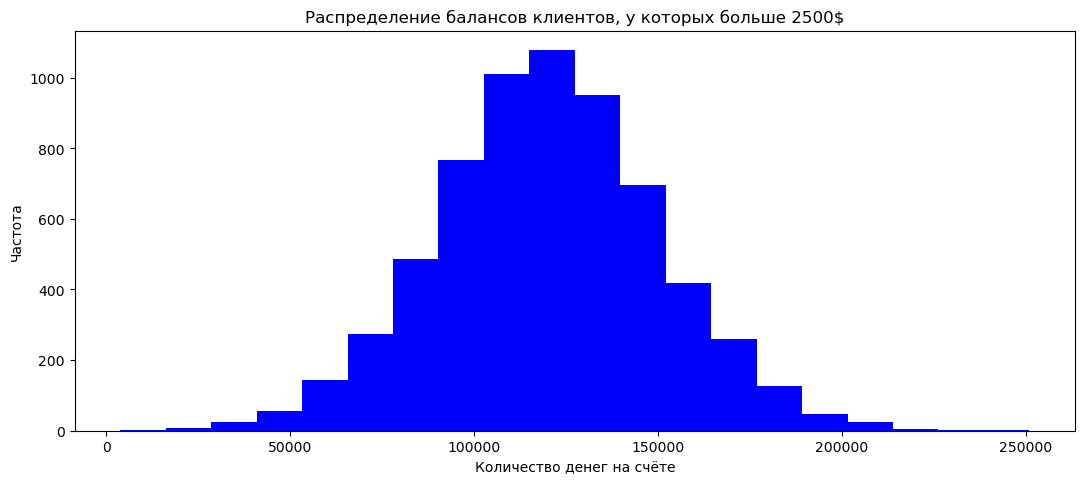

In [10]:
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(
    x=data_balance['Balance'],
    bins=20,
    color='blue'

)
axes.set_title('Распределение балансов клиентов, у которых больше 2500$')
axes.set_ylabel('Частота')
axes.set_xlabel('Количество денег на счёте');

Ответ на вопрос 2:

График балансов является нормальным распределением, математическое ожидание равно приблизительно 125 000 долларов.
Данный факт в дальнейшем может существенно облегчить построение различных эконометрических и статистических моделей, так как они часто требуют нормальное распределение данных. График также даёт представление о типичном клиенте банка, он имеет на счёте примерно от 70 000 до 180 000 долларов.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [11]:
exited_client_balance = data_balance[data_balance['Exited'] == 'Ушедший клиент']
loyal_client_balance = data_balance[data_balance['Exited'] == 'Лояльный клиент']

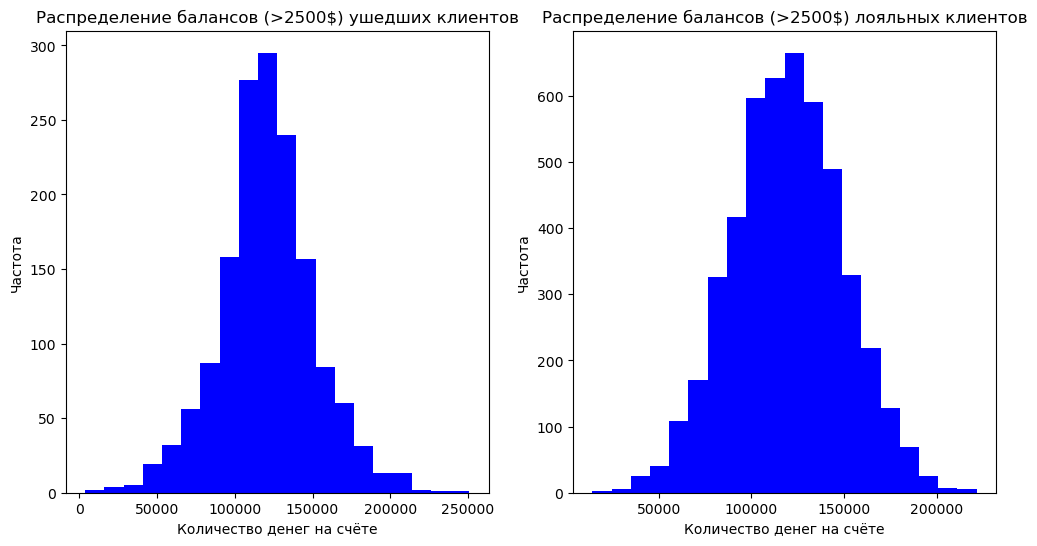

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].hist(
    x=exited_client_balance['Balance'],
    bins=20,
    color='blue'

)
axes[0].set_title('Распределение балансов (>2500$) ушедших клиентов')
axes[0].set_ylabel('Частота')
axes[0].set_xlabel('Количество денег на счёте');

axes[1].hist(
    x=loyal_client_balance['Balance'],
    bins=20,
    color='blue'

)
axes[1].set_title('Распределение балансов (>2500$) лояльных клиентов')
axes[1].set_ylabel('Частота')
axes[1].set_xlabel('Количество денег на счёте');

Ответ на вопрос 3:

Распределение ушедших клиентов имеет более длинный правый хвост, то есть среди клиентов покинувших банк были богатые люди, которым не хватало базовых/стандартных продуктов. Банк может вернуть часть состоятельных клиентов, предложив им новые условия.

Остроконечность и симметричность графика указывает на значительное количество стандартных клиентов (средний уровень баланса около 125000 долларов), которые по каким-то причинам покинули банк. Банк должен обратить особое внимание на эту группу клиентов.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [13]:
bins = [18, 30, 50, 65, 100]
labels = ['18-29', '30-49', '50-64', '65+']
churn_data['Group_age'] = pd.cut(churn_data['Age'], bins=bins, labels=labels, right=False)

In [14]:
churn_age = churn_data.groupby(['Group_age', 'Exited'])['Balance'].count().reset_index()
churn_age.rename(columns={'Balance': 'Count'}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15912\3842774642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_age = churn_data.groupby(['Group_age', 'Exited'])['Balance'].count().reset_index()


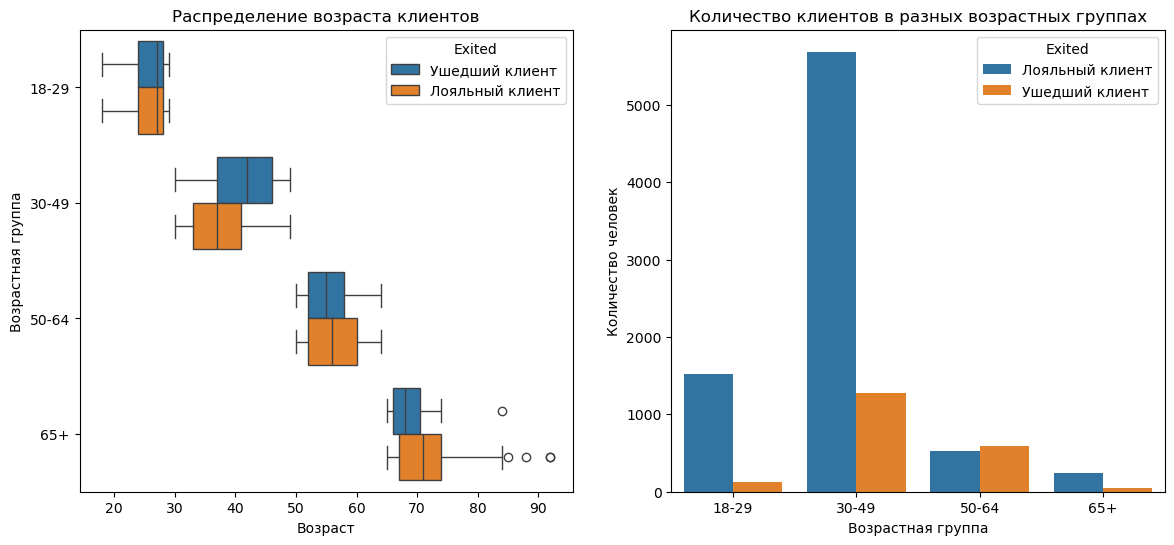

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.boxplot(
    data=churn_data,
    x='Age',
    y='Group_age',
    hue='Exited',
    width=0.8,
    dodge=True,
    ax=axes[0]
)
axes[0].set_title('Распределение возраста клиентов')
axes[0].set_ylabel('Возрастная группа')
axes[0].set_xlabel('Возраст');

sns.barplot(
    data=churn_age,
    x='Group_age',
    y='Count',
    hue='Exited',
    ax=axes[1]

)
axes[1].set_title('Количество клиентов в разных возрастных группах')
axes[1].set_ylabel('Количество человек')
axes[1].set_xlabel('Возрастная группа');


Ответ на вопрос 4:

Распределение возраста в группах 18-29 и 50-64 практически идентичны. Внимание можно обратить на группу 30-49 лет. В ней мы явно видим, что медиана и большая часть ушедших клиентов старше, чем лояльные клиенты. В группе 65+ заметны выбросы у обоих групп, однако отклонений больше у лояльных клиентов. Банку стоит проверить людей с возрастом 90+ лет, чтобы удостовериться, что это не ошибки, а действующие клиенты.

Из анализа столбчатого графика можно сделать вывод, что банку следует обратить внимание на клиентов из возрастных групп: 30-49 и 50-64, так как именно в этих группах происходит наибольший отток.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [16]:
churn_data['Credit_Group'] = pd.cut(churn_data['CreditScore'], bins=5, labels=['Low', 'Mid-Low', 'Medium', 'Mid-High', 'High'])
churn_data['Salary_Group'] = pd.cut(churn_data['EstimatedSalary'], bins=5, labels=['Low salary', 'Mid-Low salary', 'Medium salary', 'Mid-High salary', 'High salary'])
churn_data_group_credit_score = churn_data.groupby(['Credit_Group', 'Salary_Group'])['CreditScore'].count().reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_15912\3790374981.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_data_group_credit_score = churn_data.groupby(['Credit_Group', 'Salary_Group'])['CreditScore'].count().reset_index()


In [17]:
churn_data_group_credit_score

,Credit_Group,Salary_Group,CreditScore
0,Low,Low salary,30
1,Low,Mid-Low salary,45
2,Low,Medium salary,35
3,Low,Mid-High salary,43
4,Low,High salary,36
5,Mid-Low,Low salary,272
6,Mid-Low,Mid-Low salary,275
7,Mid-Low,Medium salary,304
8,Mid-Low,Mid-High salary,294
9,Mid-Low,High salary,287


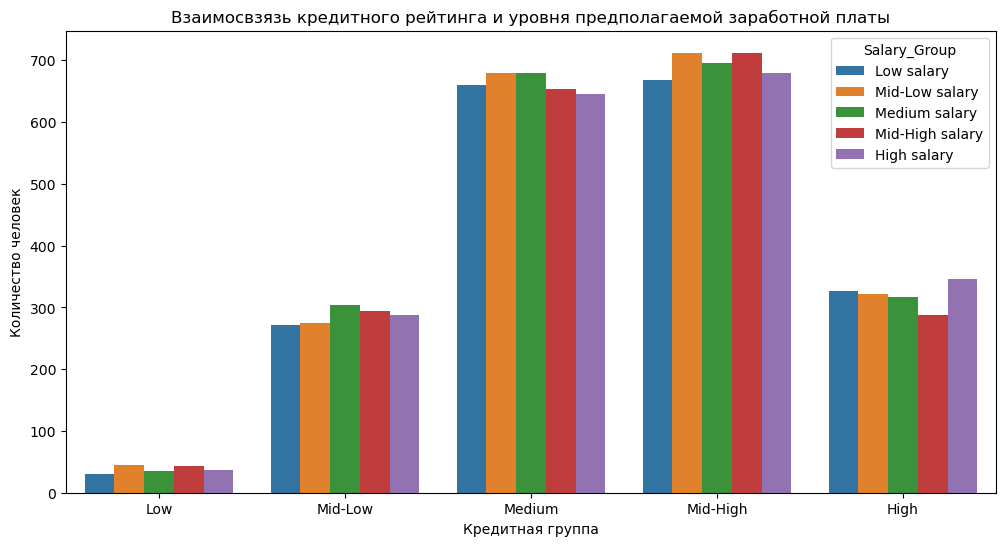

In [18]:
fig = plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=churn_data_group_credit_score,
    x='Credit_Group',
    y='CreditScore',
    hue='Salary_Group')
barplot.set_title('Взаимосвзязь кредитного рейтинга и уровня предполагаемой заработной платы')
barplot.set_ylabel('Количество человек')
barplot.set_xlabel('Кредитная группа');

Ответ на вопрос 5:

Разделив людей по кредитному рейтингу и уровню заработной платы, был построен график. На нем видно, что для каждой кредитной группы количество людей с различным доходом находится примерно на одинаковом уровне, что может утверждать об отсутствие какой-либо явной закономерности между заработной платой и кредитным рейтингом.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [19]:
churn = churn_data.groupby(['Gender', 'Exited'])['Balance'].count().reset_index()
churn.rename(columns={'Balance' : 'Count'}, inplace=True)
churn['Percent'] = 0
churn.loc[0, 'Percent'] = (churn.loc[0, 'Count'] / (churn.loc[0, 'Count'] + churn.loc[1, 'Count'])).round(3) * 100
churn.loc[1, 'Percent'] = (churn.loc[1, 'Count'] / (churn.loc[0, 'Count'] + churn.loc[1, 'Count'])).round(3) * 100
churn.loc[2, 'Percent'] = (churn.loc[2, 'Count'] / (churn.loc[2, 'Count'] + churn.loc[3, 'Count'])).round(3) * 100
churn.loc[3, 'Percent'] = (churn.loc[3, 'Count'] / (churn.loc[2, 'Count'] + churn.loc[3, 'Count'])).round(3) * 100
churn

C:\Users\user\AppData\Local\Temp\ipykernel_15912\4232989058.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '74.9' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  churn.loc[0, 'Percent'] = (churn.loc[0, 'Count'] / (churn.loc[0, 'Count'] + churn.loc[1, 'Count'])).round(3) * 100


,Gender,Exited,Count,Percent
0,Female,Лояльный клиент,3404,74.9
1,Female,Ушедший клиент,1139,25.1
2,Male,Лояльный клиент,4559,83.5
3,Male,Ушедший клиент,898,16.5


C:\Users\user\AppData\Local\Temp\ipykernel_15912\1267111012.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(['Мужчины', 'Женщины'])


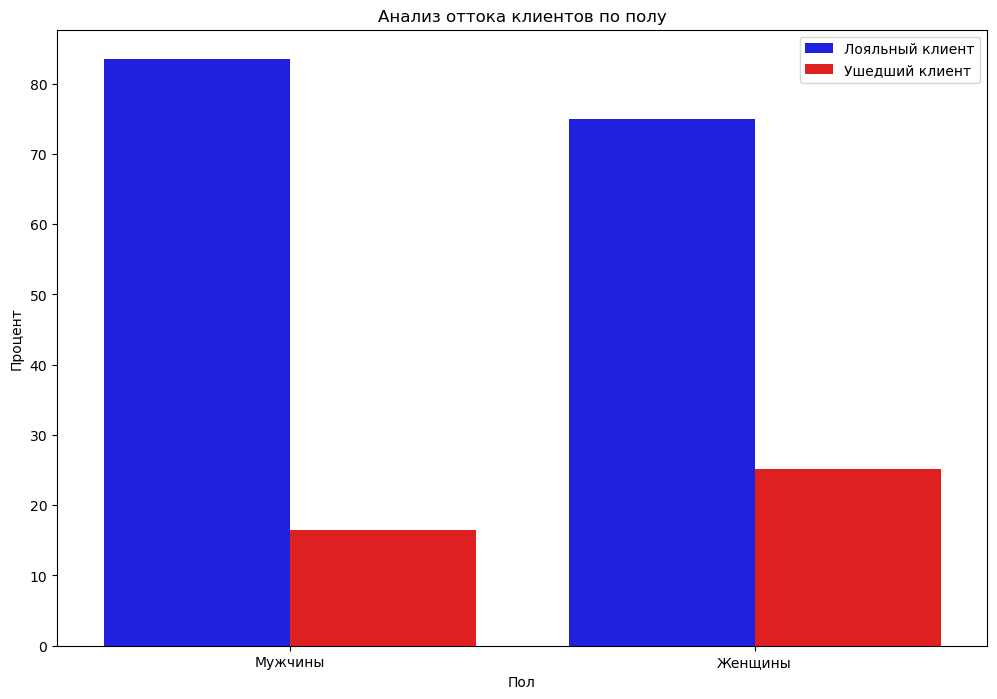

In [20]:
fig = plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    data=churn,
    x='Gender',
    y='Percent',
    hue='Exited',
    order=['Male', 'Female'],
    hue_order=['Лояльный клиент', 'Ушедший клиент'],
    palette={'Лояльный клиент': 'bLue', 'Ушедший клиент': 'red'}
)

barplot.legend(
    title='Статус',
    labels=['Лояльный клиент', 'Ушедший клиент'],
    loc='upper right'
)
barplot.legend(loc='upper right')
barplot.set_title('Анализ оттока клиентов по полу')
barplot.set_xlabel('Пол')
barplot.set_xticklabels(['Мужчины', 'Женщины'])
barplot.set_ylabel('Процент');



Ответ на вопрос 6:

Женщины покидают банк чаще, чем мужчины. Из всех женщин, которые были клиентами банка, 25% его покинули. Из всех мужчин только 16% покинули данный банк.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [21]:
churn_data_products = churn_data.groupby(['NumOfProducts', 'Exited'])['Balance'].count().reset_index()
churn_data_products.rename(columns={'Balance' : 'Count'}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15912\1635706868.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(['Лояльные клиенты', 'Ушедшие клиенты'])


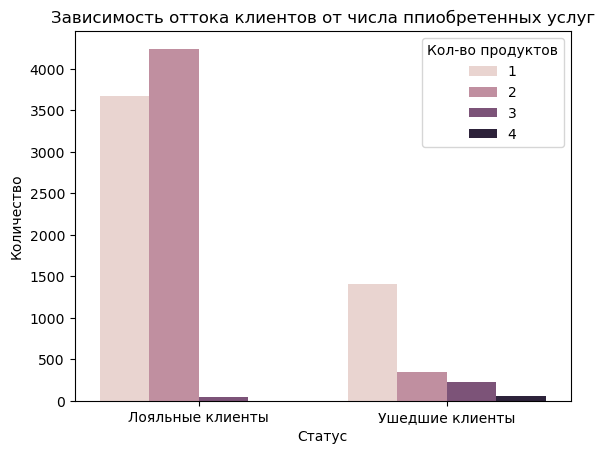

In [22]:
barplot = sns.barplot(
    data=churn_data_products,
    x='Exited',
    y='Count',
    hue='NumOfProducts'
)
barplot.set_xticklabels(['Лояльные клиенты', 'Ушедшие клиенты'])
barplot.legend(title='Кол-во продуктов')
barplot.set_title('Зависимость оттока клиентов от числа ппиобретенных услуг')
barplot.set_ylabel('Количество')
barplot.set_xlabel('Статус');

Ответ на вопрос 7.

Сразу бросается в глаза отсутствие купленных 4 продуктов у лояльных клиентов. Такая особенность может говорить о том, что клиенты попробывавшие все услуги банка сделали общий вывод о нём и покинули его.
Большинство клиентов отказались от сотрудничества с банком уже после приобретения 1 услуги, следовательно их не удовлетворил какой-то общий аспект банка, например, работа мобильного приложения, скорость транзакций, комиссии и др. Банку следует подробно исследовать негативные отзывы от клиентов и исправить их.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [23]:
churn_data_active_member = churn_data.groupby(['IsActiveMember', 'Exited'])['Balance'].count().reset_index()
churn_data_active_member.rename(columns={'Balance' : 'Count'}, inplace=True)
churn_data_active_member

,IsActiveMember,Exited,Count
0,0,Лояльный клиент,3547
1,0,Ушедший клиент,1302
2,1,Лояльный клиент,4416
3,1,Ушедший клиент,735


C:\Users\user\AppData\Local\Temp\ipykernel_15912\241695719.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(['Лояльные клиенты', 'Ушедшие клиенты'])


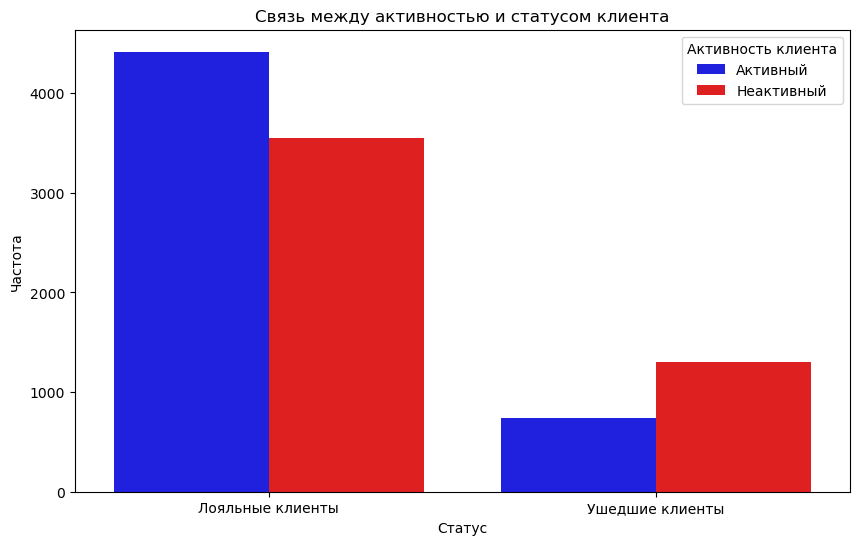

In [24]:
fig = plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=churn_data_active_member,
    x='Exited',
    y='Count',
    hue='IsActiveMember',
    hue_order=[1, 0],
    palette={1: 'bLue', 0: 'red'}
)
handles, _ = barplot.get_legend_handles_labels()
barplot.legend(
    handles=handles,
    title='Активность клиента',
    labels=['Активный', 'Неактивный']
    )

barplot.set_xticklabels(['Лояльные клиенты', 'Ушедшие клиенты'])
barplot.set_title('Связь между активностью и статусом клиента')
barplot.set_xlabel('Статус')
barplot.set_ylabel('Частота');

Ответ на вопрос 8:

Среди ушедших клиентов преобладают неактивные пользователи, что указывает на прямую связь между низкой вовлеченностью и оттоком. При этом даже среди лояльных клиентов доля активных составляет лишь около 60%, что свидетельствует о неиспользованном потенциале для роста вовлеченности. Банку следует пересмотреть систему мотивации клиентов, внедрив персональные бонусные программы и регулярные коммуникации. Особое внимание нужно уделить клиентам, которые остаются в банке, но проявляют низкую активность — для них стоит разработать специальные стимулирующие предложения.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [25]:
import plotly
import plotly.express as px

In [26]:
world_data=churn_data.groupby('Geography')['Exited_copy'].mean().reset_index()
world_data.rename(columns={'Exited_copy' : 'Share'}, inplace=True)

In [27]:
fig = px.choropleth(
    data_frame=world_data,
    locations='Geography',
    locationmode='country names',
    color='Share',
    range_color=[0, 0.5],
    title='Доля ушедших в разных странах',
    width=800,
    height=500,
    color_continuous_scale='Reds'

)
fig.show()

Ответ на вопрос 9:

Самая высокая доля ушедших клиентов в Германии - 32,4%, во Франции и Испании доли практически совпадают и составляют 16,2% и 16,7% соотвественно.
Германия - это современная страна с развитой финансовой отраслю, конкуренция среди немецких банков очень высока. Следовательно можно предположить, что рассматриваемый нами банк не выдерживает необходимый стандарт качества из-за чего граждане Германии переходят в другие банковские организации.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [28]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [29]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

In [30]:
churn_data['CreditScoreCat'].value_counts()

CreditScoreCat
Good         3703
Poor         2434
Fair         2281
Excellent     950
Very_Poor     632
Name: count, dtype: int64

In [31]:
pivot = churn_data.pivot_table(
    index='CreditScoreCat',
    columns='Tenure',
    values='Exited_copy'
).round(2)

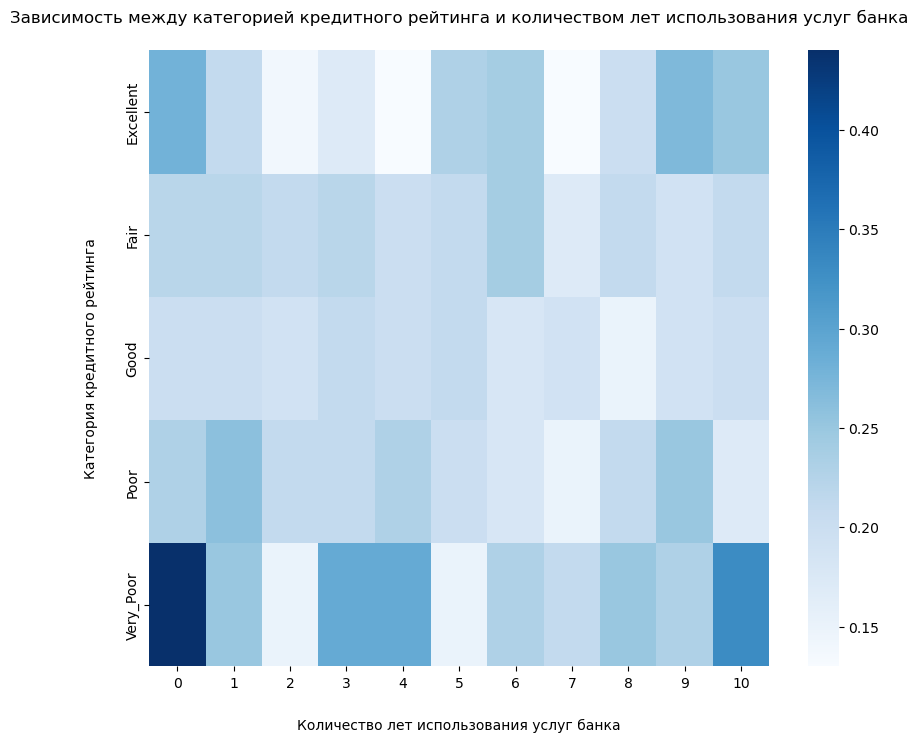

In [32]:
fig = plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data=pivot, cmap='Blues')
heatmap.set_title('Зависимость между категорией кредитного рейтинга и количеством лет использования услуг банка', pad=20)
heatmap.set_xlabel('Количество лет использования услуг банка', labelpad=20)
heatmap.set_ylabel('Категория кредитного рейтинга', labelpad=20);

Ответ на вопрос 10:

Чаще всего покидают банк люди с очень низким кредитным рейтингом (Very_Poor), которые пользовались услугами(меньше 1 года, 3 года, 4 года, 10 лет).Также достаточно часто покидают банк клиенты с высоким уровнем кредитного рейтинга(Excellent), использующие услуги банка меньше 1 года.
Самую большую долю (40%) ушедших составляют клиенты с очень низким кредитным рейтингом, которые используют услуги меньше 1 года. Такая особенность может быть связана с тем, что банк вводит повышенный контроль за клиентами, которые могут просрочить платеж по ипотеке, автокредиту, кредитной карте и проч. Кроме того, банк может взимать высокие комиссии, что отталктвает людей с низким доходом. Большой всплеск ушедших также наблюдаются у клиентов, которые сотрудничуют с банком 10 лет. Это может свидетельствовать, что организация раньше была лояльнее к клиентам с очень низким кредитным рейтингом, а сейчас пытается себя защитить от нежелательных рисков. Всплеск в 3 и 4 году можно объяснить какой-нибудь акцией, которая привлекла людей с соотвествующим кредитным рейтингом, сейчас же, вполне вероятно, что бонусы от сотрудничества с банком не перекрывают комиссии и издержки.

Если же говорить про клиентов с высоким уровнем кредитного рейтинга, то большинство из них покидают банк в первый же год пользования услуг банка. Похоже, что состоятельные клиенты недовольны какими-то аспектами работы банка, поэтому и уходят из него в другие банковские организации.